In [5]:
# ============================================================
#                  CAR REVIEWS DATASET – FULL EDA
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For text analysis
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load Data
df = pd.read_csv("/kaggle/input/ba-dataset-cleaned3/BA_dataset_cleaned.csv")  # CHANGE THIS

# VIEW BASIC INFO
print("Shape:", df.shape)
df.head()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape: (264292, 47)


,car_series,brand,vehicle_size,car_model_type,username,year_of_publication,month_of_publication,purchased_car_model,official_guide_price,vehicle_energy_type,...,performance_review,handling_evaluation,energy_consumption_evaluation,comfort_evaluation,source_file,purchase_date,combined_reviews,cleaned_text,price_difference,years_since_brand_establishment
0,Verano,Buick,Compact Car,Sedan,User33710,2022,6,Verano 2022 Pro GS Speed ​​Edition,15.89,gasoline,...,I chose this car because of its excellent valu...,"This is my first sports car, and the handling ...",I wasn't worried about fuel consumption. I res...,The car's shock absorbers are tuned to be soft...,Review_8_Final.xlsx,2022-01-01,I bought this car mainly to pick up and drop o...,bought car mainly pick up drop off my children...,-1.8,122
1,Verano,Buick,Compact Car,Sedan,User33732,2022,6,Verano 2022 Pro GS Speed ​​Edition,15.89,gasoline,...,"The 1.5T engine reaches 180P horsepower, which...","There are no major issues with handling, and t...","I don't like to step on the accelerator hard, ...","Speaking of comfort, Buick's interior is reall...",Review_8_Final.xlsx,2021-12-01,Appearance is fighting power! Living in this a...,appearance fighting power living age where app...,-1.5,122
2,Verano,Buick,Compact Car,Sedan,User33760,2022,6,Verano 2022 Pro GS Speed ​​Edition,15.89,gasoline,...,"I didn't have high hopes at first, thinking th...","Regarding handling, I personally feel the stee...",Fuel consumption depends on personal driving h...,I'd deduct a few points for comfort; it's cert...,Review_8_Final.xlsx,2021-11-01,It has been two years since I graduated. I was...,has two years since graduated assigned work pl...,1.0,122
3,Verano,Buick,Compact Car,Sedan,User33782,2022,6,Verano 2022 Pro GS Speed ​​Edition,15.89,gasoline,...,I have been driving the Pro for almost 2 month...,The driving experience is truly excellent. The...,"As for fuel consumption, I usually drive it to...",The comfort of the Verna is pretty good. The s...,Review_8_Final.xlsx,2021-09-01,"The Buick Verano Pro family has a new model, a...",buick verano pro family has new model someone ...,-1.7,122
4,Verano,Buick,Compact Car,Sedan,User33810,2022,6,Verano 2022 Pro GS Speed ​​Edition,15.89,gasoline,...,"In terms of power, the 1.5T CVT has a maximum ...",I am also very satisfied with the handling. Th...,It's 2022 now. Don't think that American cars ...,The solid chassis brings a comfortable ride. T...,Review_8_Final.xlsx,2022-04-01,What I am most satisfied with is the high conf...,what am most satisfied high configuration car ...,-1.8,122


Basic Structure & Data Types

In [6]:
df.info()

pd.DataFrame({
    "Column": df.columns,
    "Datatype": df.dtypes,
    "Missing %": df.isnull().mean().round(3) * 100
})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264292 entries, 0 to 264291
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   car_series                       253435 non-null  object 
 1   brand                            264292 non-null  object 
 2   vehicle_size                     264292 non-null  object 
 3   car_model_type                   264292 non-null  object 
 4   username                         264292 non-null  object 
 5   year_of_publication              264292 non-null  int64  
 6   month_of_publication             264292 non-null  int64  
 7   purchased_car_model              260674 non-null  object 
 8   official_guide_price             264292 non-null  float64
 9   vehicle_energy_type              264292 non-null  object 
 10  brand_energy_type                253427 non-null  object 
 11  brand_origin_country             253427 non-null  object 
 12  br

,Column,Datatype,Missing %
car_series,car_series,object,4.1
brand,brand,object,0.0
vehicle_size,vehicle_size,object,0.0
car_model_type,car_model_type,object,0.0
username,username,object,0.0
year_of_publication,year_of_publication,int64,0.0
month_of_publication,month_of_publication,int64,0.0
purchased_car_model,purchased_car_model,object,1.4
official_guide_price,official_guide_price,float64,0.0
vehicle_energy_type,vehicle_energy_type,object,0.0


Missing Values Heatmap

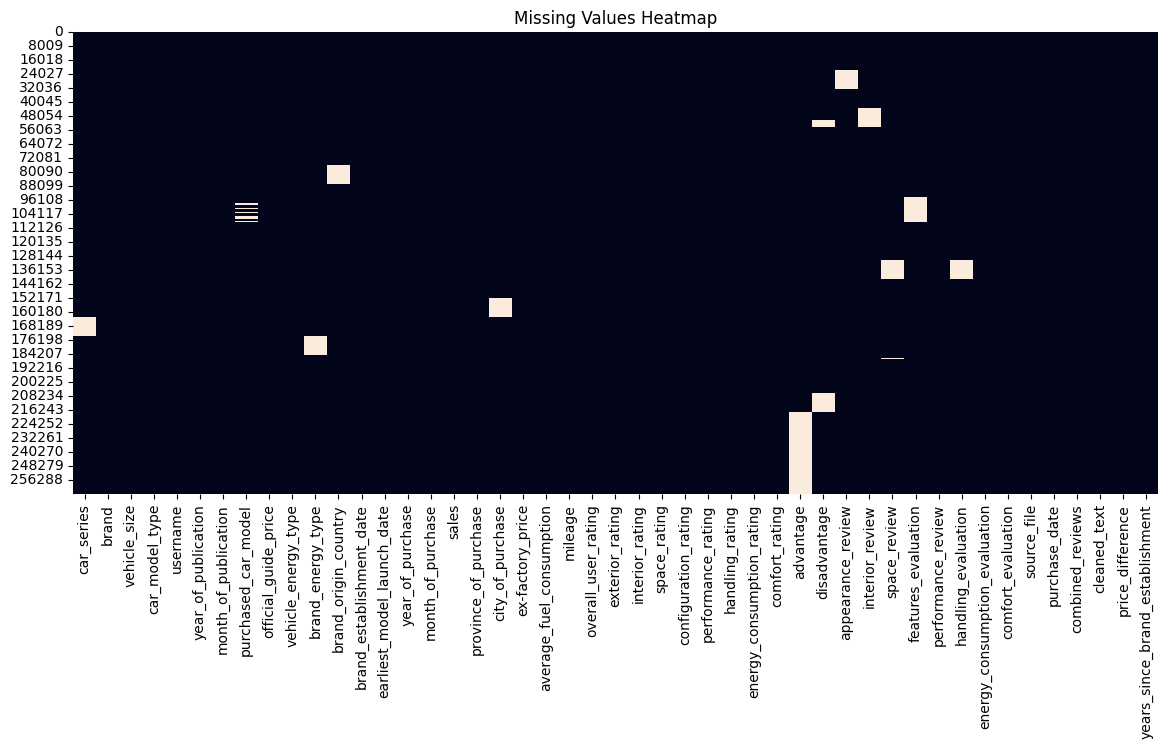

In [7]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Numerical vs Categorical Split

In [8]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical:", len(numerical_cols))
print("Categorical:", len(categorical_cols))


Numerical: 22
Categorical: 25


Numerical Summary

In [9]:
desc = df[numerical_cols].describe().T

# Add IQR = 75% - 25%
desc["IQR"] = desc["75%"] - desc["25%"]

desc



,count,mean,std,min,25%,50%,75%,max,IQR
year_of_publication,264292.0,2020.915593,2.110263,2015.00,2021.00,2022.00,2022.00,2024.0,1.00
month_of_publication,264292.0,6.081387,2.398389,1.00,5.00,6.00,8.00,12.0,3.00
official_guide_price,264292.0,23.663750,17.001022,2.68,13.78,19.92,29.38,1488.0,15.60
brand_establishment_date,264292.0,1952.133829,38.325649,1871.00,1927.00,1937.00,1995.00,2022.0,68.00
earliest_model_launch_date,264292.0,2014.112686,6.313139,1966.00,2009.00,2016.00,2019.00,2022.0,10.00
year_of_purchase,264292.0,2020.196052,1.874433,2016.00,2020.00,2021.00,2021.00,2024.0,1.00
month_of_purchase,264292.0,6.907069,3.411445,1.00,4.00,7.00,10.00,12.0,6.00
sales,264292.0,12280.506001,11683.139922,1.00,3876.00,8175.00,16779.00,65138.0,12903.00
ex-factory_price,264292.0,22.885010,16.138362,2.68,13.91,19.58,28.28,1488.0,14.37
average_fuel_consumption,264292.0,9.094425,59.426464,0.00,6.50,7.93,9.50,8300.0,3.00


Categorical Summary

In [10]:
for col in categorical_cols:
    print("\n-----", col, "-----")
    print(df[col].value_counts().head())



----- car_series -----
car_series
Asian Dragon          10666
Corolla                8392
RAV4 Rongfang          7669
Crown Land Release     5920
Qin PLUS               5593
Name: count, dtype: int64

----- brand -----
brand
Toyota        58334
public        19918
Ford          17063
BYD           16719
Geely Auto    15667
Name: count, dtype: int64

----- vehicle_size -----
vehicle_size
Compact Car          108458
Mid-size Car          71307
mid-to-large cars     20990
Small                 15823
Large                 15600
Name: count, dtype: int64

----- car_model_type -----
car_model_type
SUV          138634
Sedan        108086
Hatchback     15785
MPV            1787
Name: count, dtype: int64

----- username -----
username
User68512    2643
User17698      24
User03301      24
User03042      16
user_7616      15
Name: count, dtype: int64

----- purchased_car_model -----
purchased_car_model
Qin PLUS 2021 DM-i 55KM Flagship Edition             3322
Tang New Energy 2021 DM-i 112KM Prem

Distribution of Ratings (All Rating Columns)

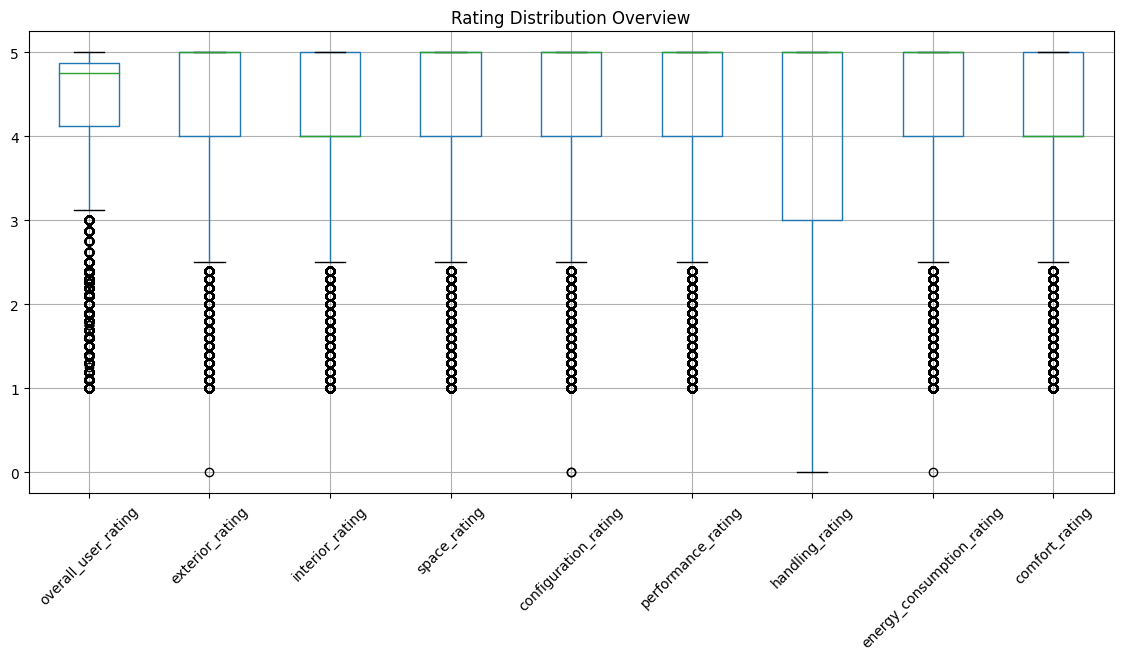

In [11]:
rating_cols = [c for c in df.columns if "_rating" in c or "evaluation" in c]

df[rating_cols].describe().T

plt.figure(figsize=(14,6))
df[rating_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Rating Distribution Overview")
plt.show()


Correlation Heatmap (Ratings Only)

Numeric rating columns: ['overall_user_rating', 'exterior_rating', 'interior_rating', 'space_rating', 'configuration_rating', 'performance_rating', 'handling_rating', 'energy_consumption_rating', 'comfort_rating']


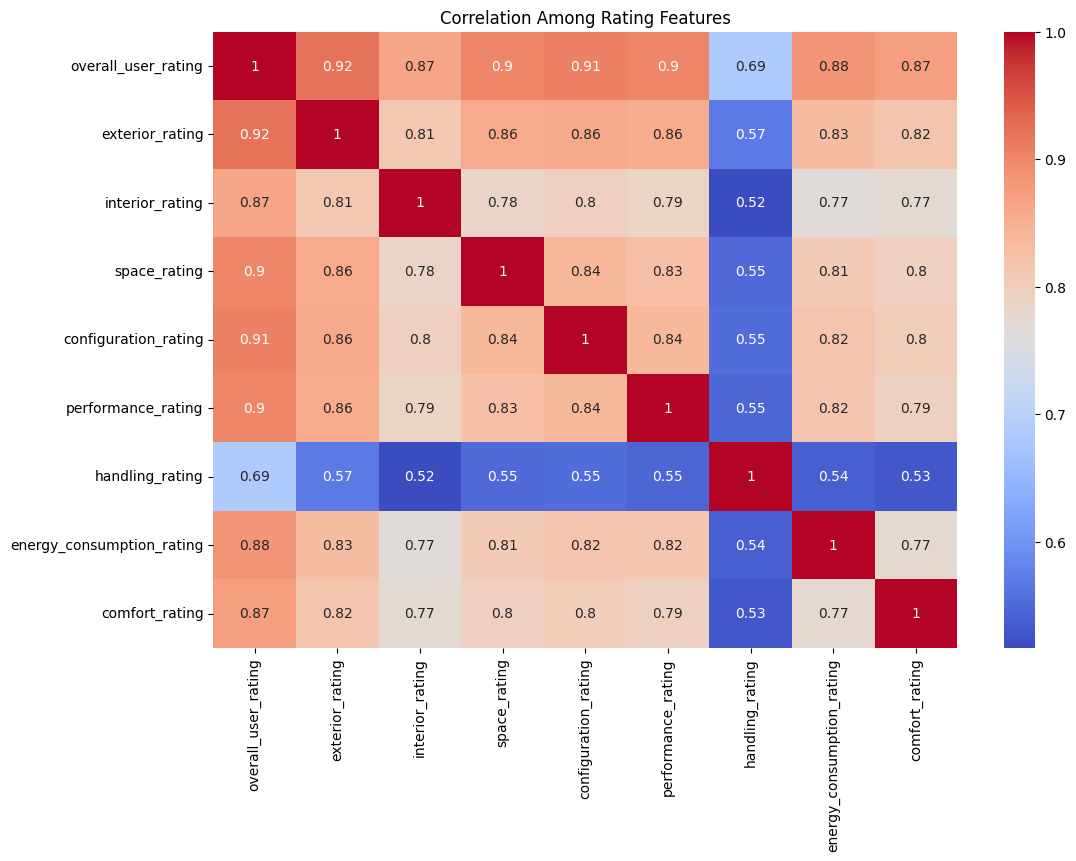

In [12]:
# Filter only numeric rating columns
numeric_rating_cols = [
    c for c in rating_cols 
    if pd.api.types.is_numeric_dtype(df[c])
]

print("Numeric rating columns:", numeric_rating_cols)

plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_rating_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Among Rating Features")
plt.show()


Fuel Consumption vs Mileage

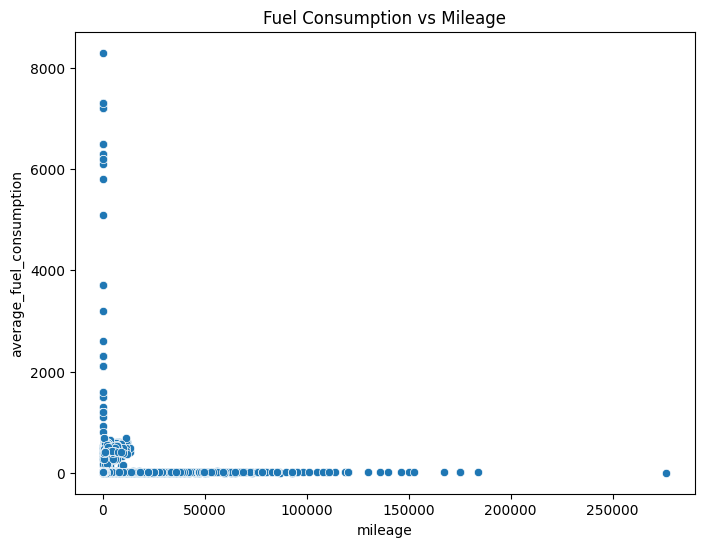

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["mileage"], y=df["average_fuel_consumption"])
plt.title("Fuel Consumption vs Mileage")
plt.show()


Price vs Mileage vs Ratings

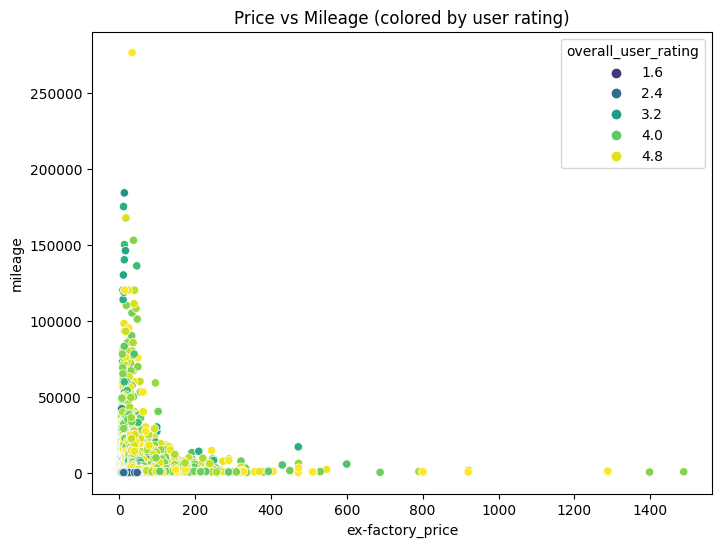

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="ex-factory_price",
    y="mileage",
    hue="overall_user_rating",
    palette="viridis"
)
plt.title("Price vs Mileage (colored by user rating)")
plt.show()


Brand Popularity

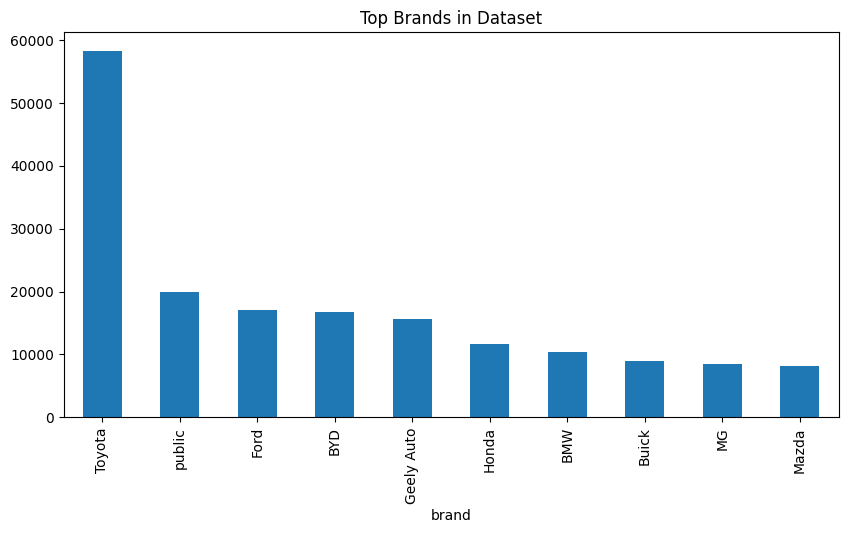

In [15]:
plt.figure(figsize=(10,5))
df["brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top Brands in Dataset")
plt.show()


Purchase Year & Month Analysis

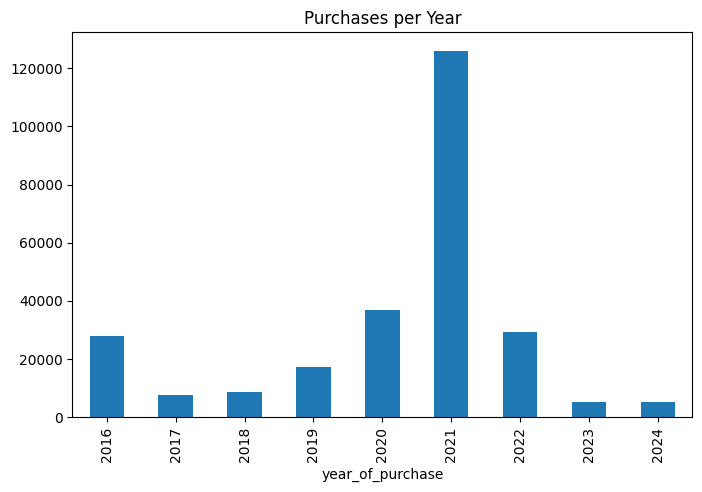

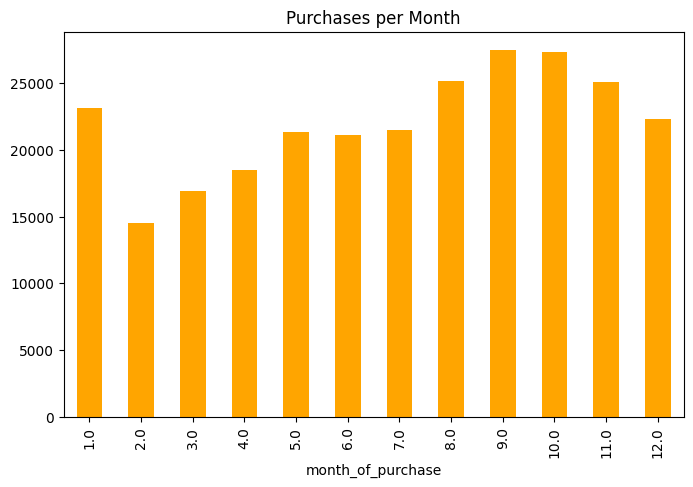

In [16]:
plt.figure(figsize=(8,5))
df["year_of_purchase"].value_counts().sort_index().plot(kind="bar")
plt.title("Purchases per Year")
plt.show()

plt.figure(figsize=(8,5))
df["month_of_purchase"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Purchases per Month")
plt.show()


Energy Type Distribution

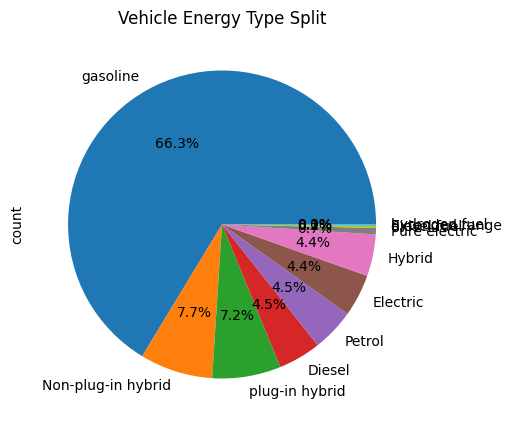

In [17]:
plt.figure(figsize=(7,5))
df["vehicle_energy_type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Vehicle Energy Type Split")
plt.show()


Text Cleaning (Optional)

In [18]:
def clean_text(t):
    if pd.isna(t): return ""
    t = t.lower()
    t = ''.join([c for c in t if c.isalpha() or c==" "])
    return t

df["clean_reviews"] = df["cleaned_text"].apply(clean_text)



Wordcloud: Advantages, Disadvantages, Review Text

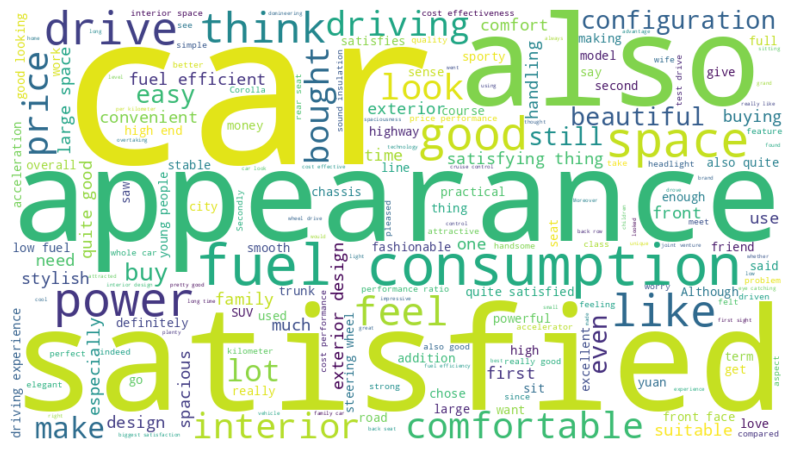

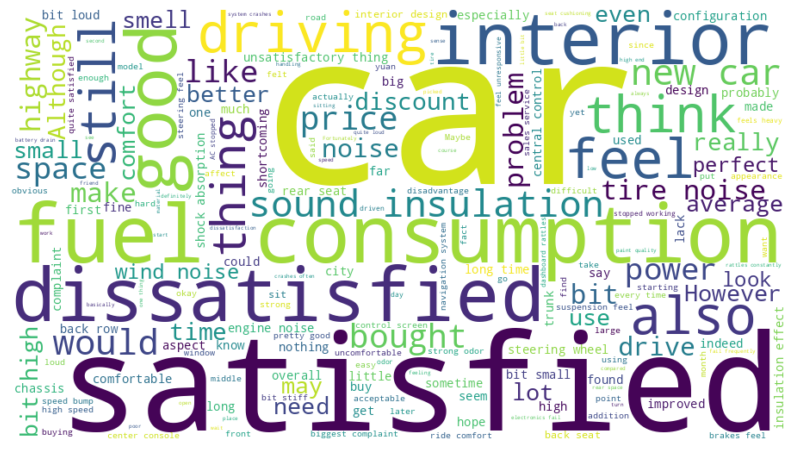

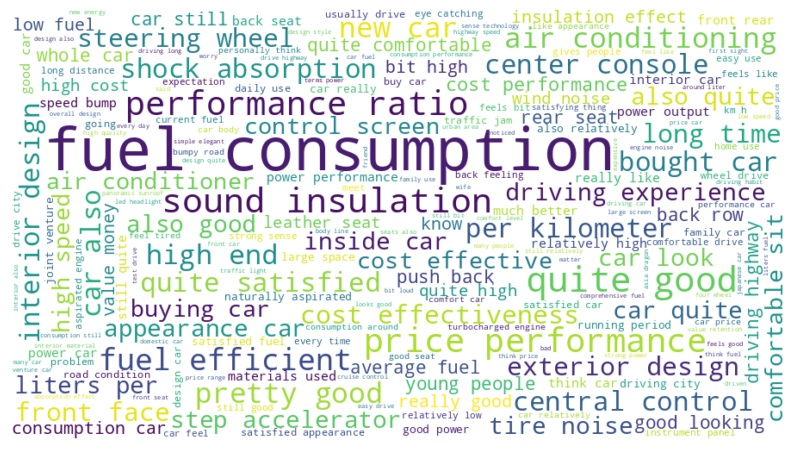

In [19]:
stop_words = set(stopwords.words("english"))

def show_wordcloud(text):
    wc = WordCloud(width=900, height=500,
                   stopwords=stop_words,
                   background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

show_wordcloud(df["advantage"].dropna().astype(str).values)
show_wordcloud(df["disadvantage"].dropna().astype(str).values)
show_wordcloud(df["clean_reviews"].dropna().values)


Sentiment Polarity (Optional)

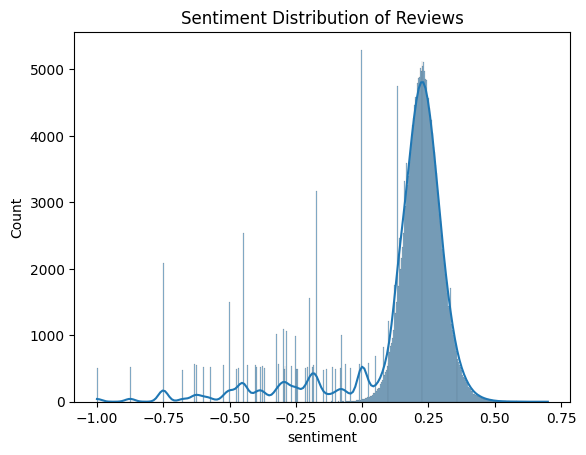

In [20]:
from textblob import TextBlob

df["sentiment"] = df["clean_reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(df["sentiment"], kde=True)
plt.title("Sentiment Distribution of Reviews")
plt.show()


Reviewer Behavior Analysis

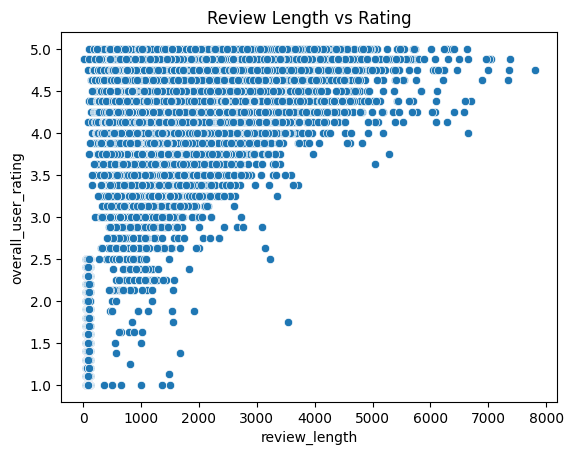

In [21]:
df["review_length"] = df["clean_reviews"].str.len()

sns.scatterplot(x="review_length", y="overall_user_rating", data=df)
plt.title("Review Length vs Rating")
plt.show()


Advantage / Disadvantage Text Length

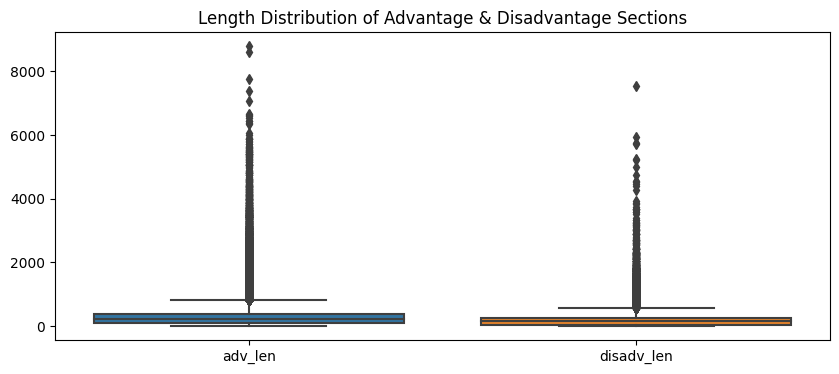

In [22]:
df["adv_len"] = df["advantage"].astype(str).str.len()
df["disadv_len"] = df["disadvantage"].astype(str).str.len()

plt.figure(figsize=(10,4))
sns.boxplot(data=df[["adv_len","disadv_len"]])
plt.title("Length Distribution of Advantage & Disadvantage Sections")
plt.show()


Outlier Detection (Price, Mileage)

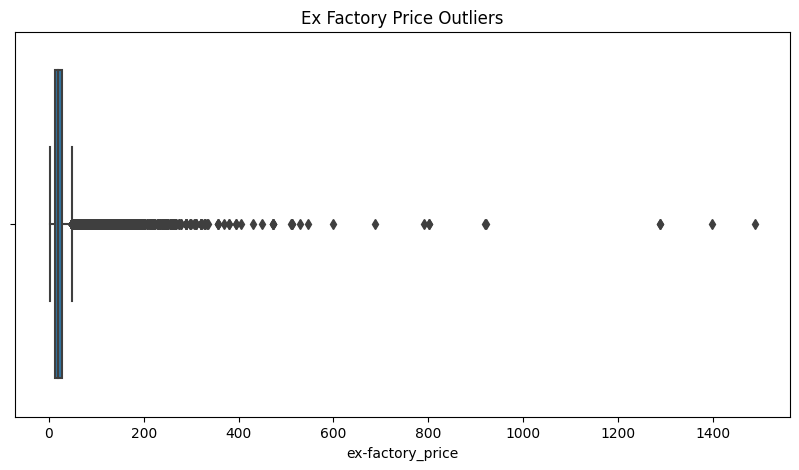

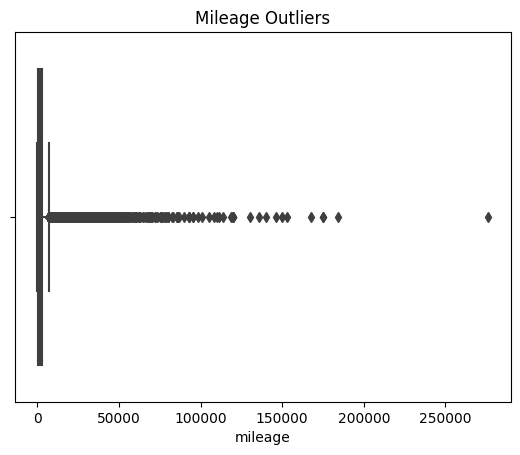

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["ex-factory_price"])
plt.title("Ex Factory Price Outliers")
plt.show()

sns.boxplot(x=df["mileage"])
plt.title("Mileage Outliers")
plt.show()


Province & City Purchase Trends

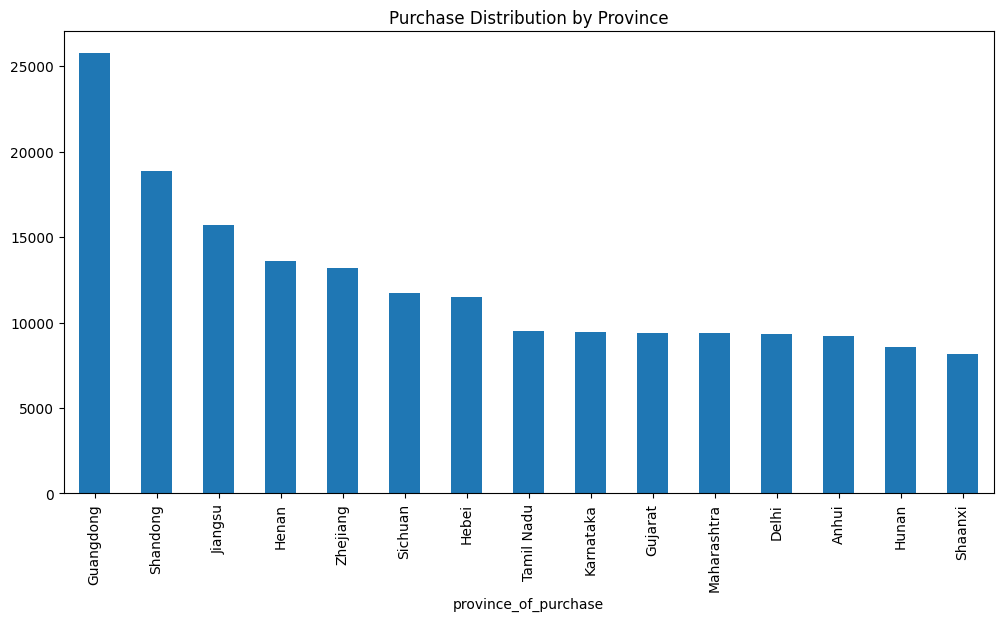

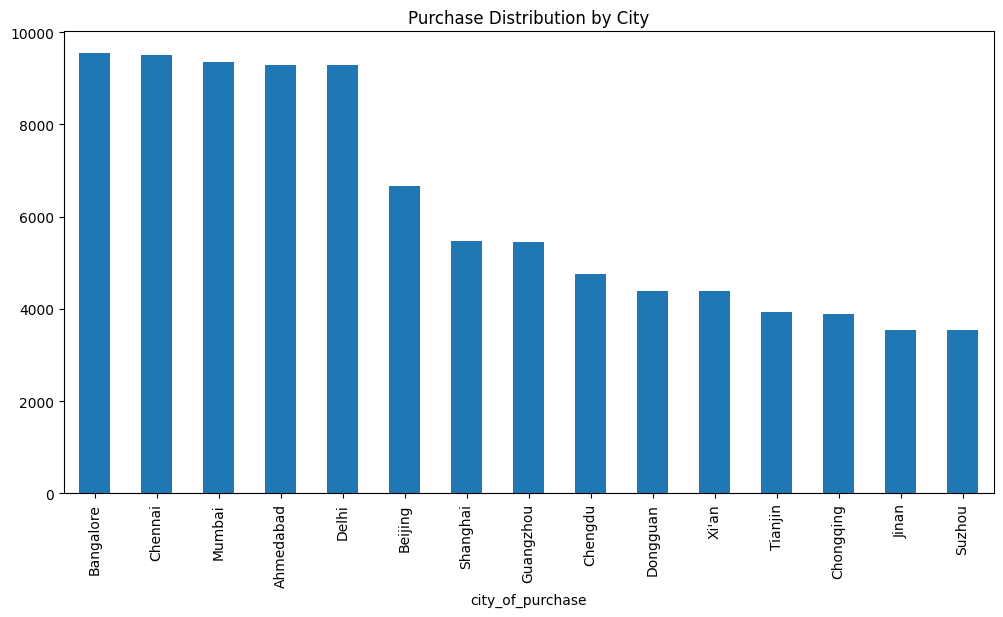

In [24]:
plt.figure(figsize=(12,6))
df["province_of_purchase"].value_counts().head(15).plot(kind="bar")
plt.title("Purchase Distribution by Province")
plt.show()

plt.figure(figsize=(12,6))
df["city_of_purchase"].value_counts().head(15).plot(kind="bar")
plt.title("Purchase Distribution by City")
plt.show()


Rating Radar Chart (Brand-level)

In [25]:
rating_cols = [c for c in df.columns if "rating" in c.lower()]
rating_cols




['overall_user_rating',
 'exterior_rating',
 'interior_rating',
 'space_rating',
 'configuration_rating',
 'performance_rating',
 'handling_rating',
 'energy_consumption_rating',
 'comfort_rating']

In [26]:
numeric_rating_cols = [
    c for c in rating_cols
    if pd.api.types.is_numeric_dtype(df[c])
]

print("VALID NUMERIC RATING COLUMNS:")
numeric_rating_cols

VALID NUMERIC RATING COLUMNS:


['overall_user_rating',
 'exterior_rating',
 'interior_rating',
 'space_rating',
 'configuration_rating',
 'performance_rating',
 'handling_rating',
 'energy_consumption_rating',
 'comfort_rating']

In [27]:
brand_group = df.groupby("brand")[numeric_rating_cols].mean().reset_index()
brand_group.head()


,brand,overall_user_rating,exterior_rating,interior_rating,space_rating,configuration_rating,performance_rating,handling_rating,energy_consumption_rating,comfort_rating
0,AITO,4.254545,4.872727,4.901818,4.596364,4.898182,4.960000,0.036364,4.894545,4.854545
1,ARCFOX,4.655556,5.000000,4.777778,4.666667,4.666667,4.666667,4.666667,4.111111,4.666667
2,Acura,4.404091,4.772727,4.613636,4.318182,4.477273,4.227273,4.272727,4.227273,4.295455
3,Ai Chi,4.555263,4.842105,4.631579,4.631579,4.578947,4.421053,4.421053,4.473684,4.421053
4,Aion,4.629310,4.775862,4.672414,4.586207,4.603448,4.482759,4.724138,4.586207,4.586207


brand-level insights

In [28]:
# Brand-level mean ratings
brand_mean_ratings = df.groupby("brand")[numeric_rating_cols].mean()

# Brand-level sentiment
from textblob import TextBlob
df["sentiment"] = df["cleaned_text"].fillna("").apply(lambda x: TextBlob(x).sentiment.polarity)
brand_sentiment = df.groupby("brand")["sentiment"].mean()

# Brand-level price vs rating
brand_price_rating = df.groupby("brand")[["ex-factory_price","overall_user_rating"]].mean()

# Brand-level fuel & performance
brand_fuel_perf = df.groupby("brand")[["average_fuel_consumption","performance_rating"]].mean()

# Composite happiness score
df["brand_happiness"] = (
    df["overall_user_rating"]*0.4 +
    df["performance_rating"]*0.2 +
    df["comfort_rating"]*0.2 +
    df["energy_consumption_rating"]*0.2
)
brand_happiness = df.groupby("brand")["brand_happiness"].mean()

brand_mean_ratings, brand_sentiment, brand_price_rating, brand_fuel_perf, brand_happiness


(           overall_user_rating  exterior_rating  interior_rating  \
 brand                                                              
 AITO                  4.254545         4.872727         4.901818   
 ARCFOX                4.655556         5.000000         4.777778   
 Acura                 4.404091         4.772727         4.613636   
 Ai Chi                4.555263         4.842105         4.631579   
 Aion                  4.629310         4.775862         4.672414   
 ...                        ...              ...              ...   
 public                4.555658         4.846621         4.367708   
 red flag              4.708678         4.901629         4.729323   
 seahorse              4.357812         4.750000         4.343750   
 southeast             4.622577         4.848287         4.513866   
 tank                  4.607319         4.918336         4.734977   
 
            space_rating  configuration_rating  performance_rating  \
 brand                         

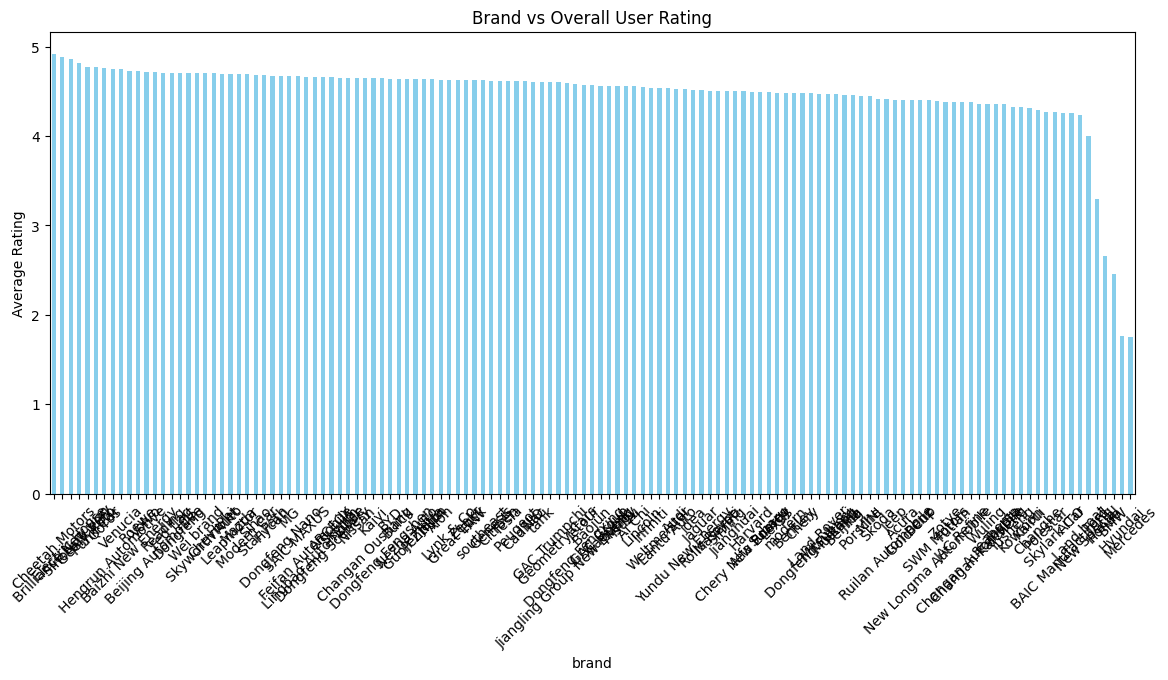

In [29]:
plt.figure(figsize=(14,6))
brand_mean_ratings["overall_user_rating"].sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Brand vs Overall User Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


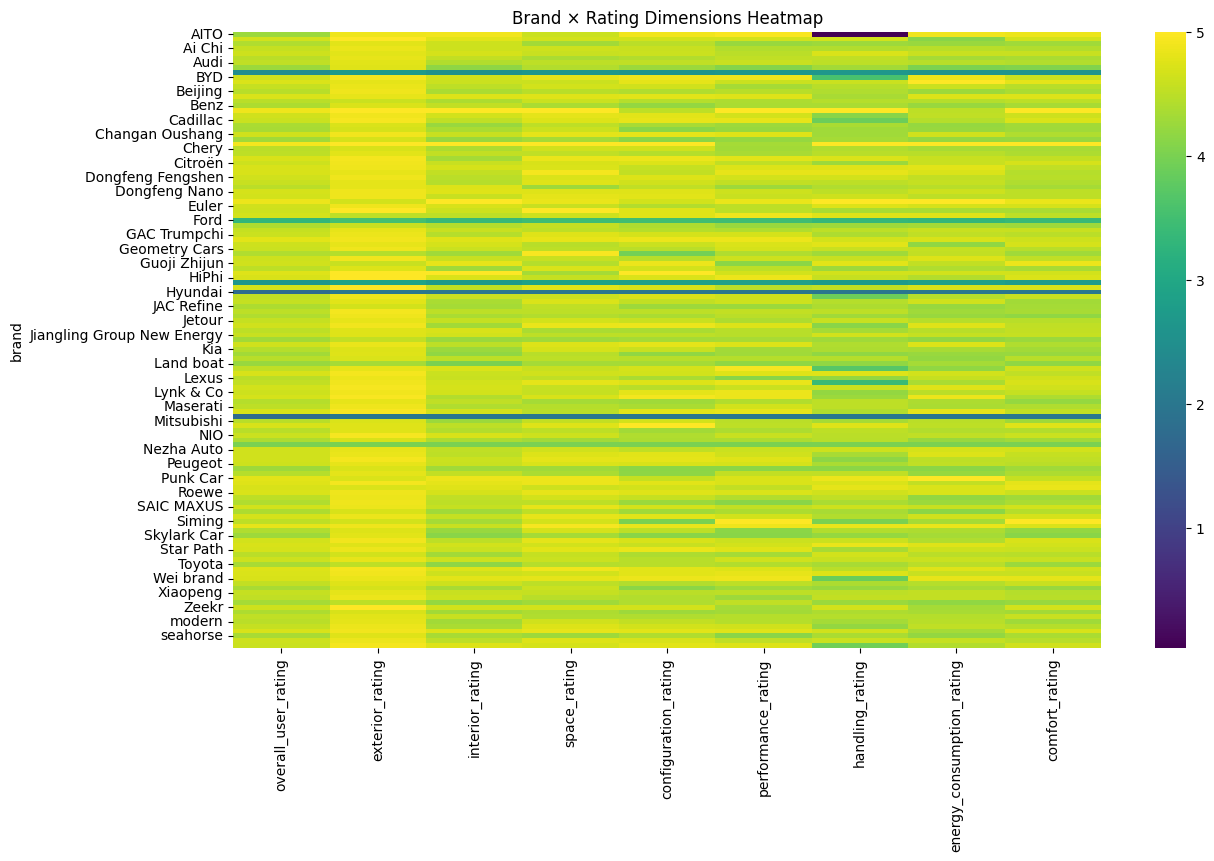

In [30]:
plt.figure(figsize=(14,8))
sns.heatmap(brand_mean_ratings, annot=False, cmap="viridis")
plt.title("Brand × Rating Dimensions Heatmap")
plt.show()


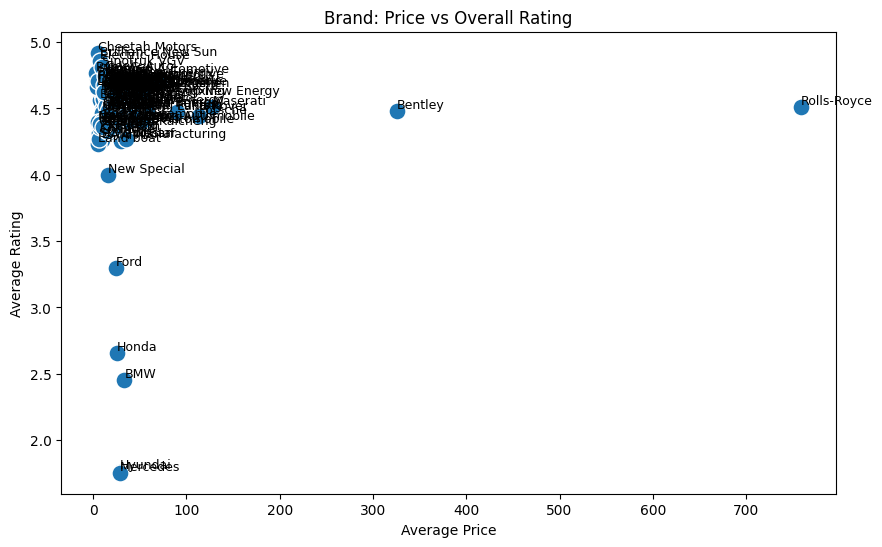

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=brand_price_rating["ex-factory_price"],
    y=brand_price_rating["overall_user_rating"],
    s=150
)

for brand in brand_price_rating.index:
    plt.text(
        brand_price_rating.loc[brand,"ex-factory_price"]+0.1,
        brand_price_rating.loc[brand,"overall_user_rating"]+0.02,
        brand,
        fontsize=9
    )

plt.xlabel("Average Price")
plt.ylabel("Average Rating")
plt.title("Brand: Price vs Overall Rating")
plt.show()


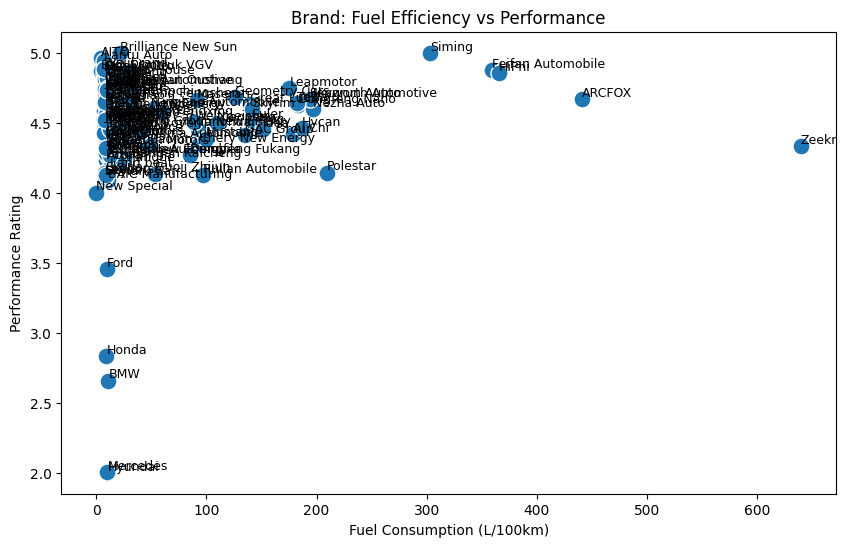

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=brand_fuel_perf["average_fuel_consumption"],
    y=brand_fuel_perf["performance_rating"],
    s=150
)

for brand in brand_fuel_perf.index:
    plt.text(
        brand_fuel_perf.loc[brand, "average_fuel_consumption"]+0.02,
        brand_fuel_perf.loc[brand, "performance_rating"]+0.02,
        brand,
        fontsize=9
    )

plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("Performance Rating")
plt.title("Brand: Fuel Efficiency vs Performance")
plt.show()


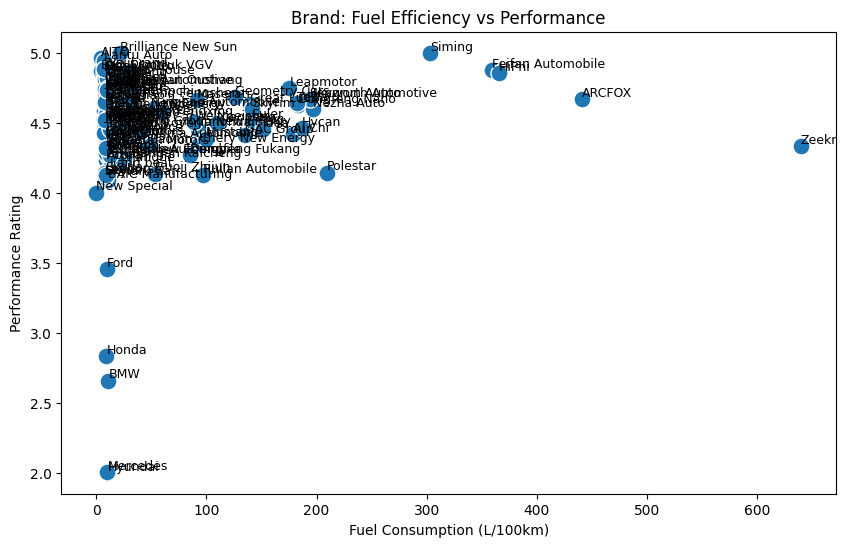

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=brand_fuel_perf["average_fuel_consumption"],
    y=brand_fuel_perf["performance_rating"],
    s=150
)

for brand in brand_fuel_perf.index:
    plt.text(
        brand_fuel_perf.loc[brand, "average_fuel_consumption"]+0.02,
        brand_fuel_perf.loc[brand, "performance_rating"]+0.02,
        brand,
        fontsize=9
    )

plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("Performance Rating")
plt.title("Brand: Fuel Efficiency vs Performance")
plt.show()


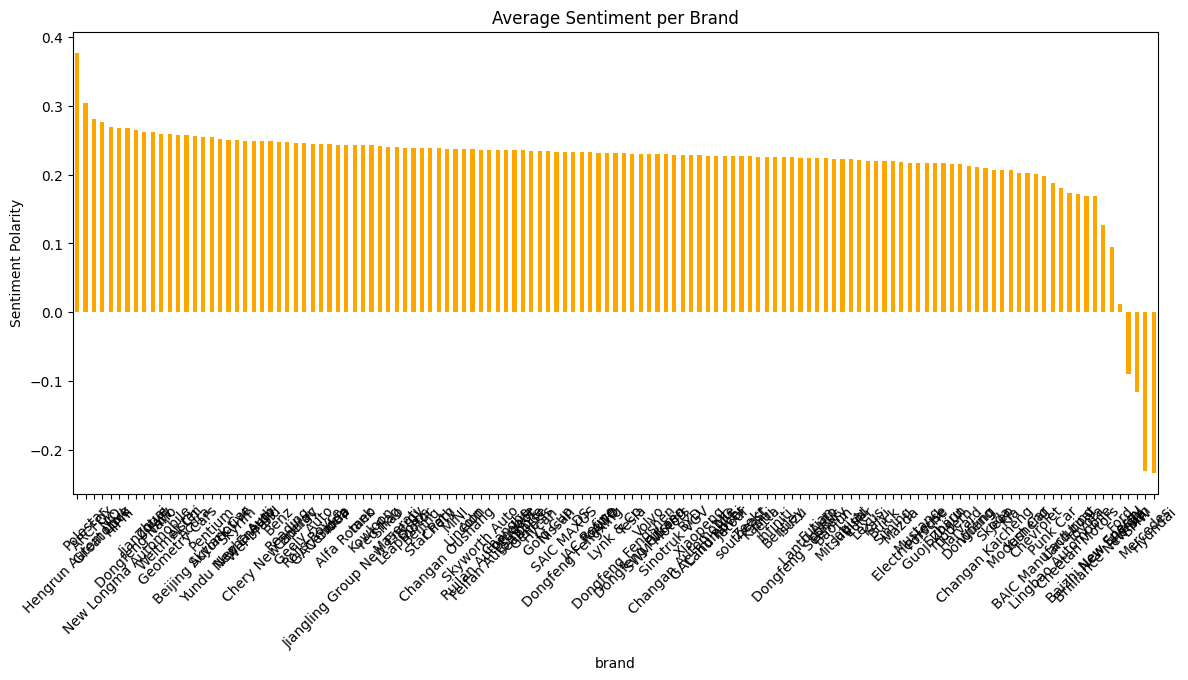

In [34]:
plt.figure(figsize=(14,6))
brand_sentiment.sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Average Sentiment per Brand")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


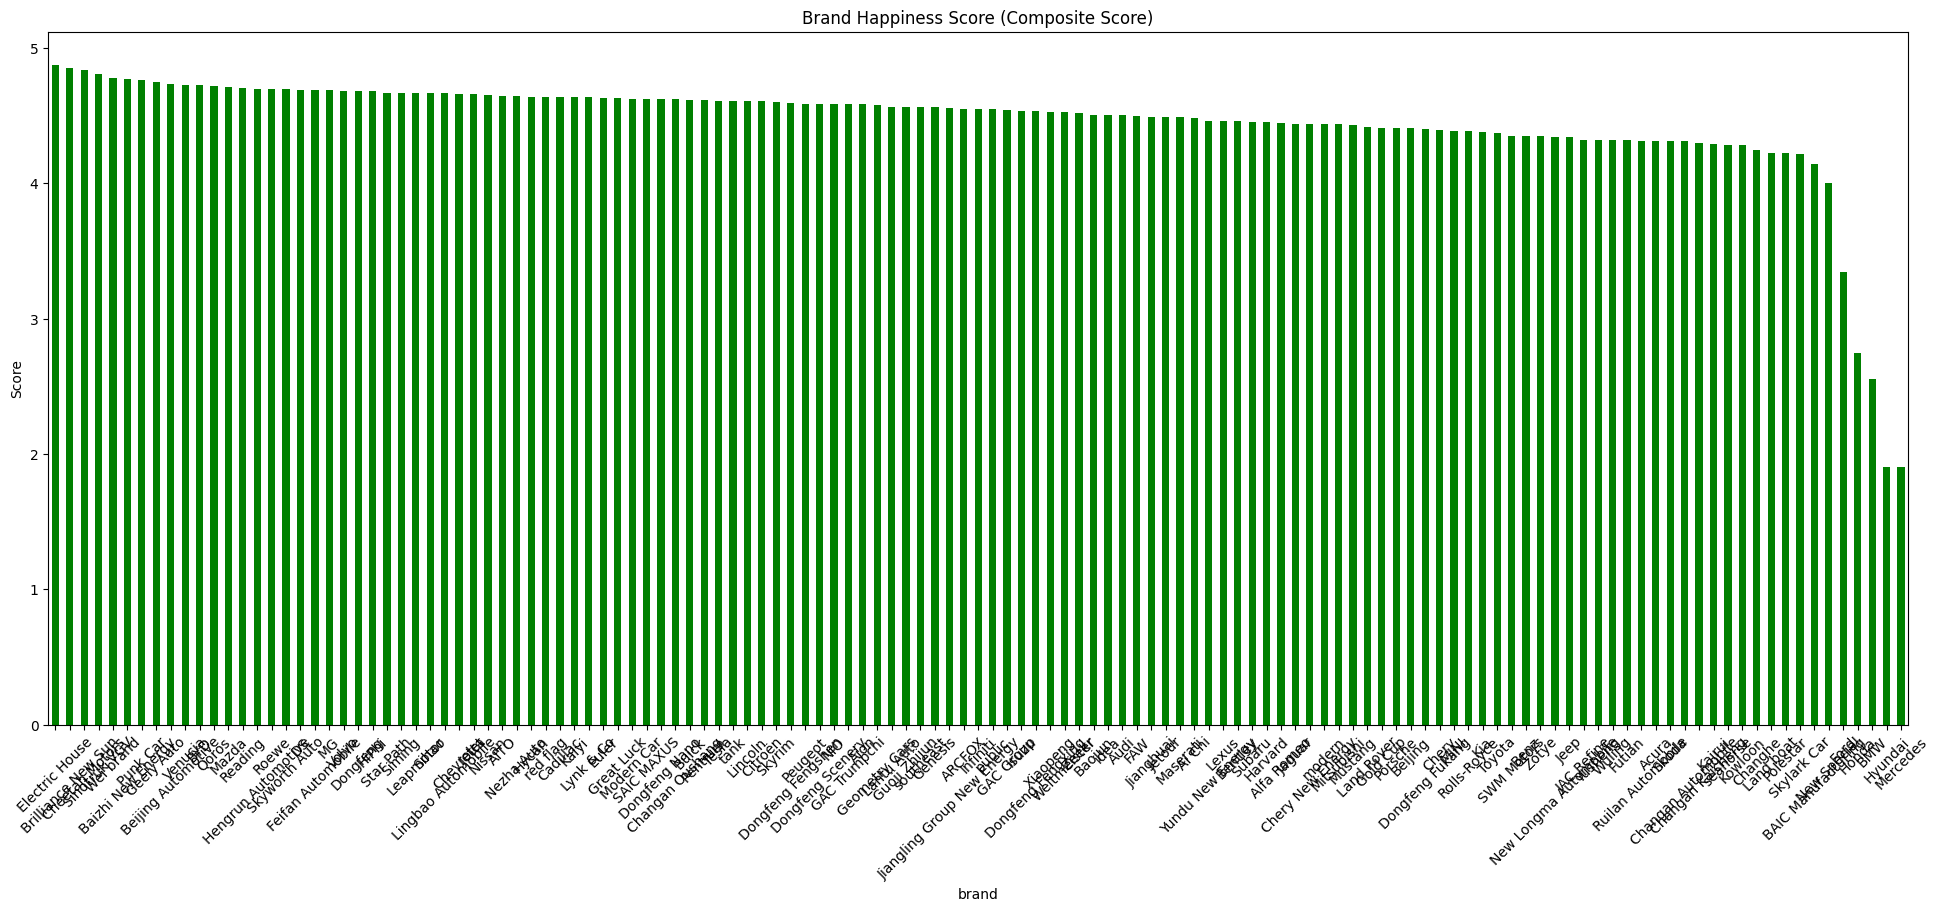

In [35]:
plt.figure(figsize=(24,9))
brand_happiness.sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Brand Happiness Score (Composite Score)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


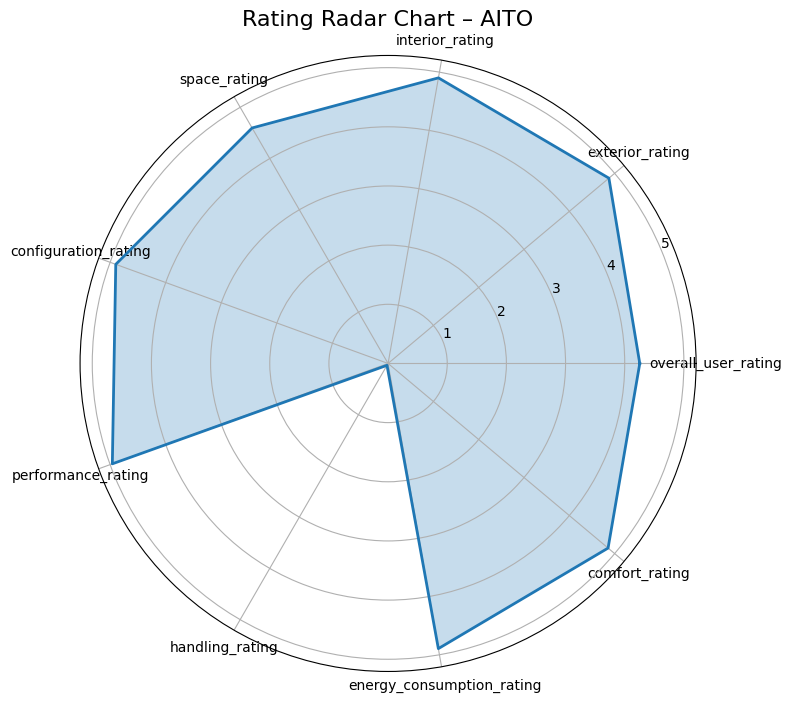

In [36]:
import numpy as np

def plot_brand_radar(brand):
    categories = numeric_rating_cols
    values = brand_mean_ratings.loc[brand].values
    values = np.append(values, values[0])  # close the loop

    angles = np.linspace(0, 2*np.pi, len(categories)+1)

    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, rotation=45)
    ax.set_title(f"Rating Radar Chart – {brand}", size=16)

    plt.show()

# Example:
plot_brand_radar("AITO")   # change brand name
